In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_curve
import warnings

warnings.filterwarnings('ignore')

In [2]:
# mint
# perfomance = pd.read_csv('/home/jorge/Programacion/Ciencia Datos/IFTS11/ProcesamientoML/Entrega/ProcesamientoML/Student_performance_data.csv')
# windows
perfomance = pd.read_csv('C:/Users/yorlu/Documents/Programacion/Ciencia Datos/IFTS 11/ProsesamientoIA/ProcesamientoML/Student_performance_data.csv')

In [3]:
perfomance.head(20)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [4]:
perfomance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
# perfomance.nunique()

In [6]:
# perfomance['Age'].value_counts()

In [7]:
# perfomance['Absences'].value_counts()

In [8]:
perfomance[['GPA', 'GradeClass']].describe()

,GPA,GradeClass
count,2392.000000,2392.000000
mean,1.906186,2.983696
std,0.915156,1.233908
min,0.000000,0.000000
25%,1.174803,2.000000
50%,1.893393,4.000000
75%,2.622216,4.000000
max,4.000000,4.000000


In [9]:
perfomance[['GPA', 'GradeClass']]

,GPA,GradeClass
0,2.929196,2.0
1,3.042915,1.0
2,0.112602,4.0
3,2.054218,3.0
4,1.288061,4.0
...,...,...
2387,3.455509,0.0
2388,3.279150,4.0
2389,1.142333,2.0
2390,1.803297,1.0


En la decripcion de la descripcion de los datos nos dice
"GradeClass: Clasificación de las calificaciones de los estudiantes basada en el GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)"
la cual no se cumple con la GPA que se aporto

In [10]:
perfomance.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [11]:
perfomance.shape

(2392, 15)

In [12]:
# perfomance.isnull().sum()

In [13]:
perfomance.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [14]:
perfomance.fillna(0, inplace=True)

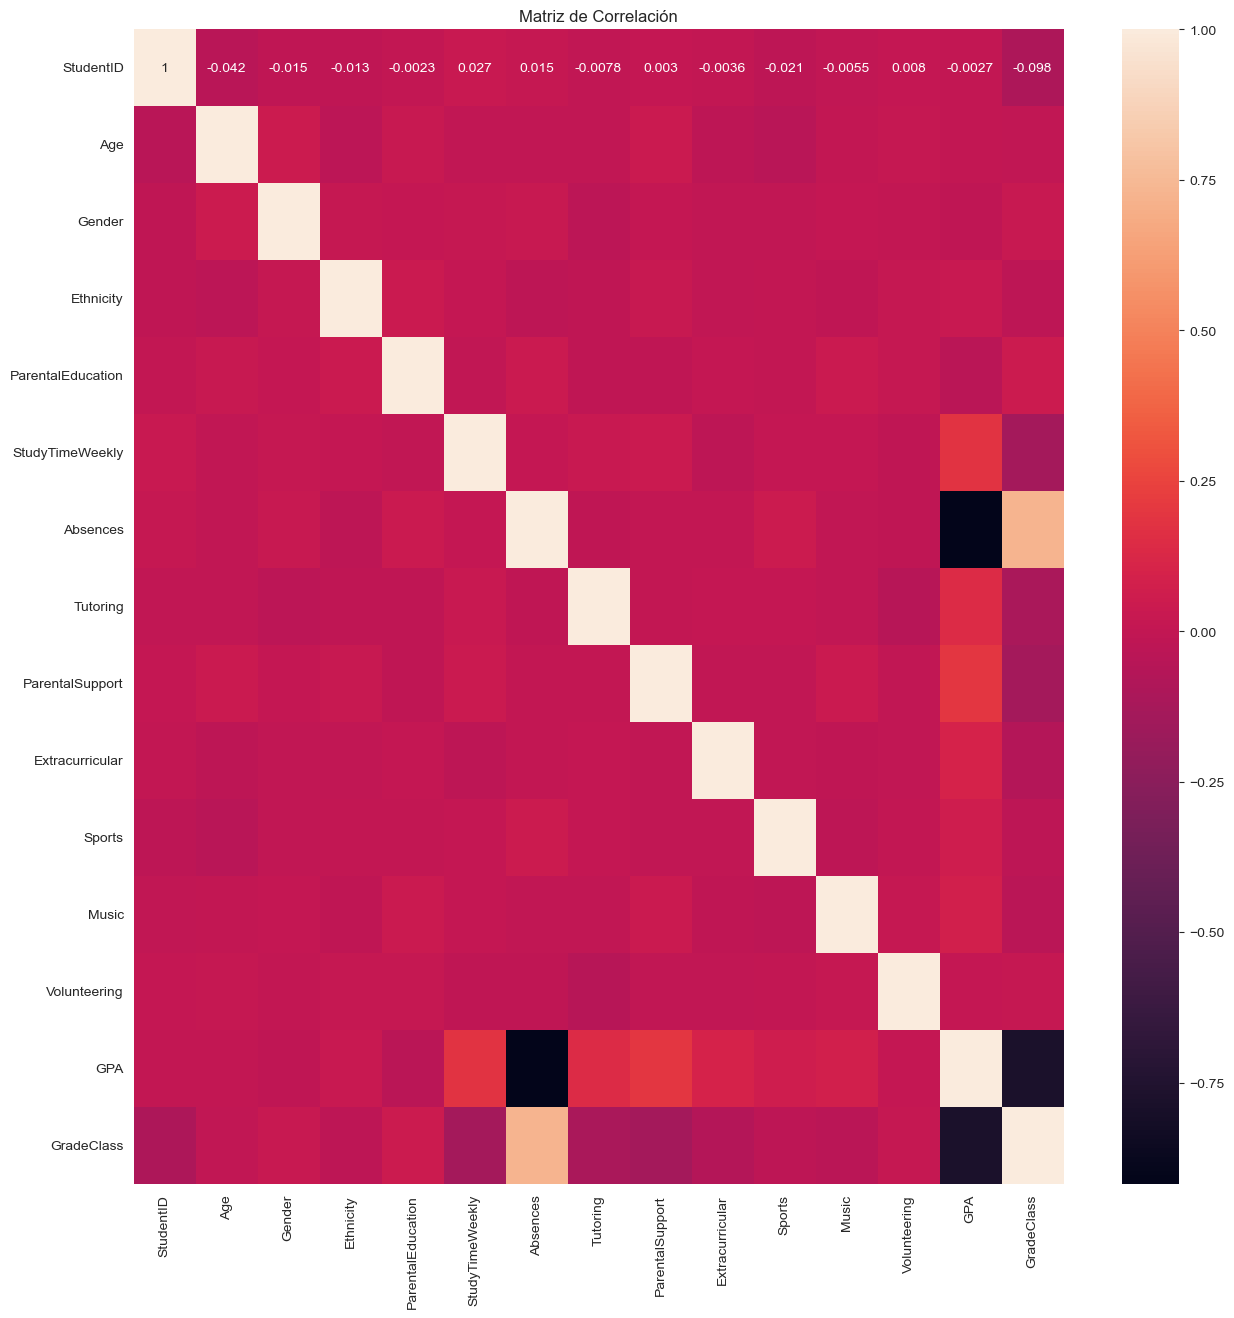

In [15]:
correlation_matrix = perfomance.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

Viendo el grafico, noto pocas relaciones, las mas fuestes apuntan entre GPA y Horas de estudio, control parental y tutorias, las cuales seran el eje del modelo de prediccion

In [16]:
# sns.barplot(data=perfomance, x='Absences', y='GPA')
# plt.show()

Aca tenemos una relacion directa entre los dias que falta, con la nota final que consigue, ambo valores son inversamente proporcionales, cuanto mas flata mas bajo el promedio de clasificaciones

In [17]:
perfomance.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [18]:
# convierto valores float en valores int para poder trabajar con esos datos
perfomance['GPA'] = perfomance['GPA'].astype('int64')
perfomance['GradeClass'] = perfomance['GradeClass'].astype('int64')
perfomance['StudyTimeWeekly'] = perfomance['StudyTimeWeekly'].astype('int64')

In [19]:
perfomance[['GPA', 'GradeClass']]

,GPA,GradeClass
0,2,2
1,3,1
2,0,4
3,2,3
4,1,4
...,...,...
2387,3,0
2388,3,4
2389,1,2
2390,1,1


In [20]:
perfomance.dtypes

StudentID            int64
Age                  int64
Gender               int64
Ethnicity            int64
ParentalEducation    int64
StudyTimeWeekly      int64
Absences             int64
Tutoring             int64
ParentalSupport      int64
Extracurricular      int64
Sports               int64
Music                int64
Volunteering         int64
GPA                  int64
GradeClass           int64
dtype: object

Exactitud de entrenamiento de Music: 80.61%
Exactitud de prueba de Music: 79.12%
Sobreajuste de Music: 1.48%
Puntuacion media de validación cruzada para Music: 80.06%
Precision de Music: 62.6%
Recall de Music: 79.12%
F1-score de Music: 69.9%
Matriz de confusión de Music: 
[[379   0]
 [100   0]]


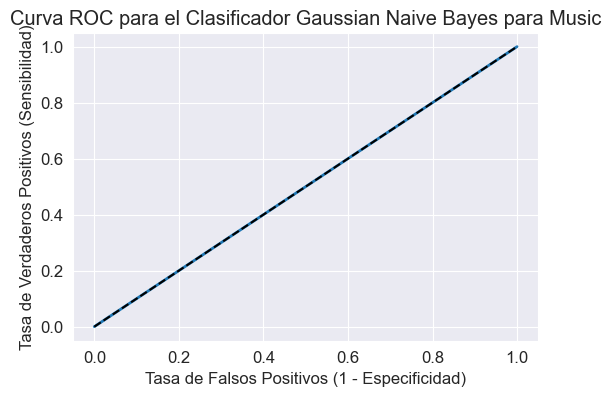



Exactitud de entrenamiento de Volunteering: 84.63%
Exactitud de prueba de Volunteering: 82.88%
Sobreajuste de Volunteering: 1.75%
Puntuacion media de validación cruzada para Volunteering: 84.28%
Precision de Volunteering: 68.69%
Recall de Volunteering: 82.88%
F1-score de Volunteering: 75.12%
Matriz de confusión de Volunteering: 
[[397   0]
 [ 82   0]]


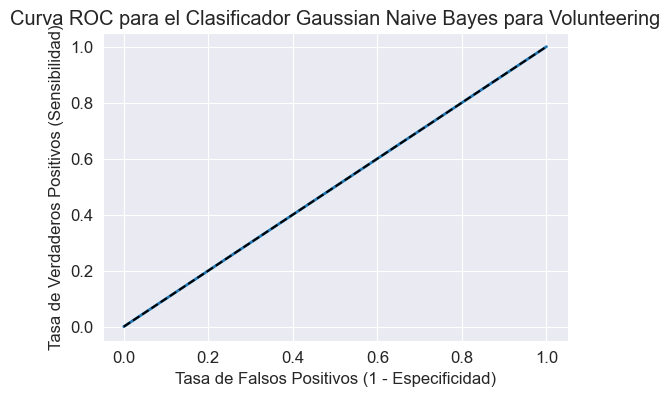



Exactitud de entrenamiento de GPA: 83.22%
Exactitud de prueba de GPA: 83.09%
Sobreajuste de GPA: 0.13%
Puntuacion media de validación cruzada para GPA: 81.52%
Precision de GPA: 85.2%
Recall de GPA: 83.09%
F1-score de GPA: 84.05%
Matriz de confusión de GPA: 
[[ 67  12   1   0   0]
 [ 22 129  11   0   0]
 [  0  16 148   4   1]
 [  0   0   1  54  11]
 [  0   0   0   2   0]]


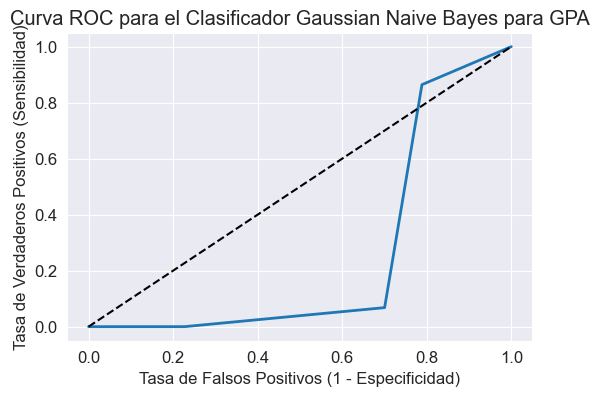



Exactitud de entrenamiento de GradeClass: 82.75%
Exactitud de prueba de GradeClass: 76.2%
Sobreajuste de GradeClass: 6.55%
Puntuacion media de validación cruzada para GradeClass: 81.02%
Precision de GradeClass: 72.68%
Recall de GradeClass: 76.2%
F1-score de GradeClass: 73.39%
Matriz de confusión de GradeClass: 
[[  0  18   3   2   5]
 [  2  47   1   3   2]
 [  0   0  58  13   5]
 [  0   0  47  39   9]
 [  1   0   1   2 221]]


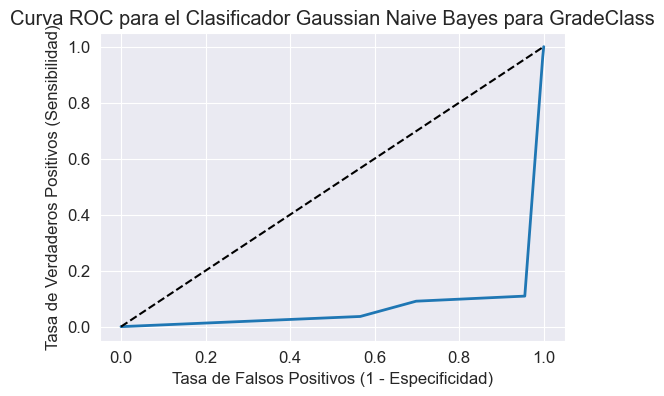

In [25]:
for column in perfomance.columns:
        if column != 'StudentID':
                X = perfomance.drop(['StudentID', column], axis=1)
                y = perfomance[column]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

                # Creo y entreno el modelo 
                model = GaussianNB()
                model.fit(X_train, y_train)

                # Hago predicciones
                y_pred = model.predict(X_test)

                # Calculo la precision del modelo en los datos de entrenamiento
                acc_train = model.score(X_train, y_train)

                # Calculo la precision del modelo en los datos de prueba
                acc_test = model.score(X_test, y_test)

                # Presicion mayor que 75
                if acc_test >= 0.75:
                        print(f'Exactitud de entrenamiento de {column}: {round(acc_train * 100,2)}%')
                        print(f'Exactitud de prueba de {column}: {round(acc_test * 100,2)}%')

                        # Calculo el sobreajuste
                        overfitting = acc_train - acc_test
                        print(f'Sobreajuste de {column}: {round(overfitting * 100,2)}%')

                        # Realizo una validacion cruzada de 5 particiones
                        puntaje = cross_val_score(model, X, y, cv=5)
                        cv_exactitud = puntaje.mean()
                        print(f'Puntuacion media de validación cruzada para {column}: {round(puntaje.mean()*100,2)}%')

                        # Calculo la precisión
                        precision = precision_score(y_test, y_pred, average='weighted')
                        print(f'Precision de {column}: {round(precision * 100,2)}%')

                        # Calculo el recall
                        recall = recall_score(y_test, y_pred, average='weighted')
                        print(f'Recall de {column}: {round(recall * 100,2)}%')

                        # Calculo el F1-score
                        f1 = f1_score(y_test, y_pred, average='weighted')
                        print(f'F1-score de {column}: {round(f1 * 100,2)}%')

                        # Calculo la matriz de confusión
                        conf_matrix = confusion_matrix(y_test, y_pred)
                        print(f'Matriz de confusión de {column}: \n{conf_matrix}')

                        # Calculo la curva ROC
                        fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

                        # Trazo la curva ROC
                        plt.figure(figsize=(6,4))
                        plt.plot(fpr, tpr, linewidth=2)
                        plt.plot([0,1], [0,1], 'k--')
                        plt.rcParams['font.size'] = 12
                        plt.title(f'Curva ROC para el Clasificador Gaussian Naive Bayes para {column}')
                        plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
                        plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
                        plt.show()
                        
                        print('\n')

En el modelo solo tomo presiciones mayores a 75%, para reducir el rango de los datos en lo es mas eficiente el modeloy realizar conclusiones mas acertadas

## Realizando un recuendo de todos los resultados (tomado de uno de los resultados):

1. Music: Mi modelo para predecir música tiene una precisión decente, acertando alrededor del 80% tanto en entrenamiento como en pruebas. Sin embargo, la precisión, que mide cuántas veces acierta cuando predice positivos, es del 62.6%, lo que significa que algunas predicciones positivas podrían estar equivocadas. Aunque el modelo puede identificar bien las clases positivas, la forma en que clasifica puede mejorar.

2. Volunteering: Para el modelo de voluntariado, obtuve una precisión del 82.88% en las pruebas, un poco mejor que en el entrenamiento, lo que sugiere que podría estar adaptándose demasiado a los datos de entrenamiento. Aunque puedo predecir con precisión tanto los casos positivos como negativos, veo que podría ajustar mejor los casos donde predigo incorrectamente.

3. GPA: En cuanto a predecir el GPA, logré una exactitud de alrededor del 83%, con un bajo ajuste hacia los datos de entrenamiento. Esto me indica que el modelo es bastante bueno para generalizar a nuevos datos. Aunque puedo predecir múltiples clases de GPA con precisión, hay algunos desafíos en clasificar las clases intermedias, donde podría mejorar.

4. GradeClass: Finalmente, mi modelo para clasificar las calificaciones muestra un rendimiento moderado con una exactitud del 76.2% en las pruebas, un poco menos que en el entrenamiento. Esto sugiere que puede haber cierto sobreajuste. Aunque puedo clasificar bien la mayoría de las clases, enfrento desafíos en algunas clases intermedias, lo que podría mejorar con ajustes avanzados.

Estos modelos muestran un buen rendimiento en sus respectivas tareas, aunque enfrentan a problemas como el sobreajuste y la precisión en ciertas clases.